## Deep learning

**Aim:** The main aim of the project is process images of sign language of digits from 0 to 9.

**Data set:**
* The dataset is taken from Kaggle which
consists of images for digits in sign language
* The dataset consists of 2062 images of size 64x64 and a label dataset of digits 0 to 9 in .npy format
* x.shape = (2062, 64, 64)
* y.shape = (2062, 10)


**Data Cleaning and Exploration**


*   Identified the image type and plotted sample image of first and last data point
*   Plotted the `countplot` of number of data available for wach label
* Identified 10 sample images for single label
* Identified one sample image of each label



**Training model on three variations of deep learning**



1.   Variation 1: Deep learning with `Sequential` model with 4 hidden layer

  * Three `Conv2D` using `MaxPooling2D` with `pool_size` = (2,2), `activation = 'relu'`
  * One `Dense` using `Dropout` = 0.2 and `Activation = 'relu'`
  * Final `Dense` layer with `activation = 'Softmax'`
2.   Variation 2: Deep learning model with same 4 hidden layers but with `Data augmentation`
  * `rotation_range` = 20
  * `height_shift_range` = 0.2
  * `width_shift_range` = 0.2
  * `shear_range` = 0.2
  * `zoom_range` = 0.2
  * `horizontal_flip` = True
  * `vertical_flip` = True
  * `fill_mode` = 'nearest'
3. Variation 3: Deep learning model with same hidden layer but without `MaxPooling` and `Dropout`



**Key Findings**

By training our model with three different variations, we found that the accuracy and losses for each model as:

1. Deep learning with `MaxPooling2D` and `Dropout`:

  * Test loss: 0.34
  * Test accuracy: 91.28

  * Train loss: 0.34
  * Train accuracy: 91.28

2. Deep learning with `Data augmentation`:

  * Test loss: 2.15
  * Test accuracy: 26.15
  * Train loss: 2.15
  * Train accuracy: 24.72

3. Deep learning with `MaxPooling2D` and `Dropout`:

  * Test loss: 1.31
  * Test accuracy: 77.24
  * Train loss: 0.24
  * Train accuracy: 95.45

From above accuracy and losses, we can see that `Model 1` with 4 hidden layers using max-pooling and dropout performed best compared to other two models.

When performed Data augmentation, the performance of model dropped drastically in `Model 2`, suggesting that model needs to be trained by optimizing parameters to get better results.

`Model 3` performed slightly better than model 2, with accuracy of 77.24%.



**Future steps**:

To improve the accuracy of the our model, we can optimize various hyperparameters like, using different optimizer, using more deeper layers. We can also reduce the computation using transfer learning by freezing initial layers.

In [3]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [151]:
# importing libraries for deep learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [108]:
# importing dataset
x = np.load('X.npy')
y = np.load('Y.npy')

In [109]:
# exploring dataset structure
print(x.shape)
print(y.shape)

(2062, 64, 64)
(2062, 10)


We see that y is already categorized

In [110]:
# checking image type and pixel range
print(f'image data type: {x.dtype}')
print(f'pixel range: {x.min().round(2)}, {x.max().round(2)}')

image data type: float32
pixel range: 0.0, 1.0


as the min and max values of pixel is between 0 and 1, the values of x is already standardized

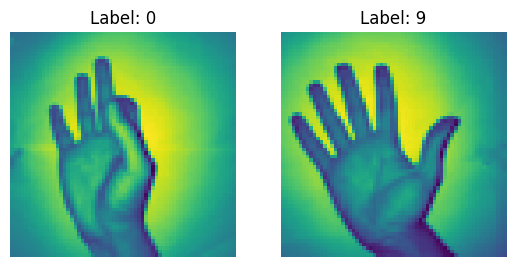

In [160]:
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x[0].reshape(img_size, img_size))
plt.title(f'Label: {np.argmax(y[0])}')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x[2026].reshape(img_size, img_size))
plt.title(f'Label: {np.argmax(y[2026])}')
plt.axis('off')
plt.savefig('sample_images.png')
plt.show()
plt.close()

In [162]:
# getting labels form categorical y
y_labels = np.argmax(y, axis=1)
print(y_labels.shape)

(2062,)


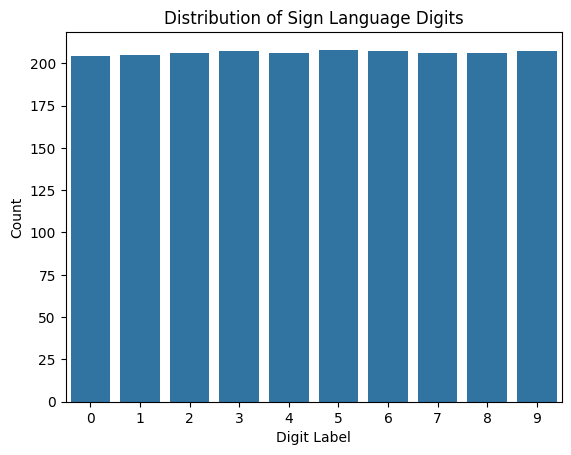

In [163]:
# counting the number of data points for each label
sns.countplot(x=y_labels)
plt.title("Distribution of Sign Language Digits")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.savefig('digit_counts.png')
plt.show()
plt.close()

In [114]:
y_series = pd.Series(y_labels)
print(f'number of unique digits: {y_series.nunique()}')
print(f'Unique digits: {y_series.unique()}')
print(f'Digit counts:\n{y_series.value_counts().sort_index()}')

number of unique digits: 10
Unique digits: [0 1 2 3 4 5 6 7 8 9]
Digit counts:
0    204
1    205
2    206
3    207
4    206
5    208
6    207
7    206
8    206
9    207
Name: count, dtype: int64


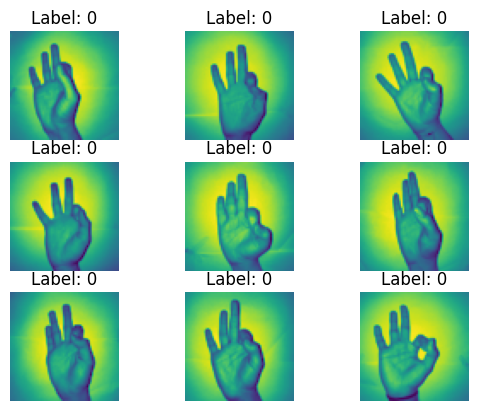

In [164]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i].reshape(img_size, img_size))
    plt.title(f'Label: {np.argmax(y[i])}')
    plt.axis('off')

plt.savefig('sample_single_label_images.png')
plt.show()
plt.close()

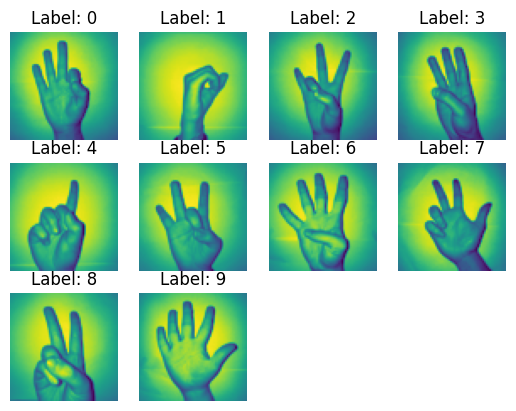

In [165]:
# getting one image from each label
for i in range(10):
  y_labels = np.where(y_series == i)[0] # finds indices of all samples where label = i
  n = np.random.choice(y_labels) # randomly selects one index n from list of indices
  plt.subplot(3,4,i+1)
  plt.imshow(x[n].reshape(img_size, img_size))
  plt.title(f'Label: {np.argmax(y[n])}')
  plt.axis('off')
plt.savefig('label_images.png')
plt.show()
plt.close()

### Variation 1:
Simple Sequential model with 3 hidden layers

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

In [118]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (1649, 64, 64)
y_train shape: (1649, 10)
x_test shape: (413, 64, 64)
y_test shape: (413, 10)


In [119]:
model1 = Sequential()
x = x.reshape(x.shape[0], img_size, img_size, 1)
input_shape = (img_size, img_size, 1)

In [120]:
# hidden layer 1
model1.add(Conv2D(32,(3,3), input_shape = input_shape, activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 2
model1.add(Conv2D(64,(3,3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 3
model1.add(Conv2D(128,(3,3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

# hidden layer 4
model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.3))

# output layer
model1.add(Dense(10, activation = 'softmax'))

In [121]:
# compiling the model
model1.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [122]:
history = model1.fit(x_train, y_train,
                    validation_split = 0.2,
                    epochs = 10,
                    batch_size = 32)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - accuracy: 0.0914 - loss: 2.3126 - val_accuracy: 0.1576 - val_loss: 2.2926
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - accuracy: 0.2485 - loss: 2.1978 - val_accuracy: 0.6182 - val_loss: 1.1942
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.5953 - loss: 1.2472 - val_accuracy: 0.7667 - val_loss: 0.7484
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.6951 - loss: 0.8960 - val_accuracy: 0.7970 - val_loss: 0.6583
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 257ms/step - accuracy: 0.7549 - loss: 0.7008 - val_accuracy: 0.8212 - val_loss: 0.5165
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - accuracy: 0.8041 - loss: 0.5859 - val_accuracy: 0.8576 - val_loss: 0.4470
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.8461 - loss: 0.4339 - val_accuracy: 0.8818 - val_loss: 0.3728
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.8885 - loss: 0.3368 - val_accur

In [123]:
# evaluating model
test_loss, test_accuracy = model1.evaluate(x_test, y_test)
print(f'Test loss: {round(test_loss,2)}')
print(f'Test accuracy: {round(test_accuracy*100,2)}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9182 - loss: 0.2856
Test loss: 0.34
Test accuracy: 91.28


In [177]:
train_loss, train_accuracy = model1.evaluate(x_test, y_test)
print(f'Train loss: {round(train_loss,2)}')
print(f'Train accuracy: {round(train_accuracy*100,2)}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9182 - loss: 0.2856
Train loss: 0.34
Train accuracy: 91.28


In [124]:
# predicting y
y_pred_prob = model1.predict(x_test) # probabilities of each class
y_pred_labels = np.argmax(y_pred_prob, axis=1) # predicting class labels

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [125]:
y_true = np.argmax(y_test, axis = 1)

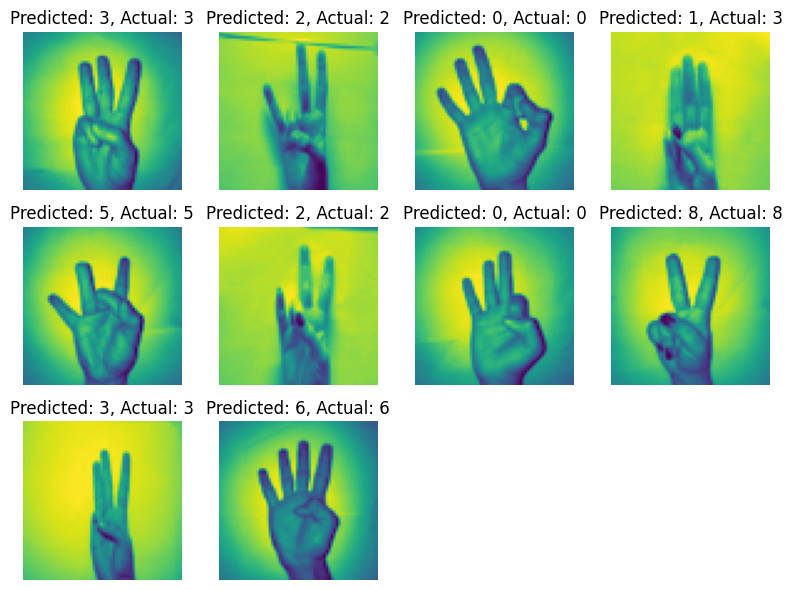

In [166]:
# visualizing predictions
plt.figure(figsize=(8,6))
for i in range(10):
  plt.subplot(3,4,i+1)
  plt.imshow(x_test[i].reshape(img_size, img_size))
  plt.title(f'Predicted: {y_pred_labels[i]}, Actual: {y_true[i]}')
  plt.axis('off')
plt.tight_layout()

plt.savefig('predictions_1.png')
plt.show()
plt.close()

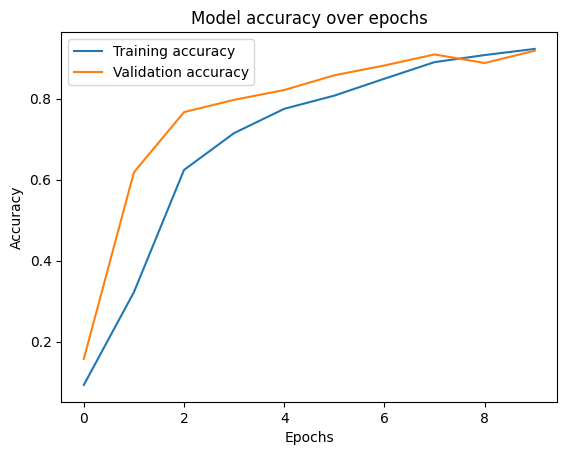

In [167]:
# plotting accuracy
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Model accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_1.png')
plt.show()
plt.close()

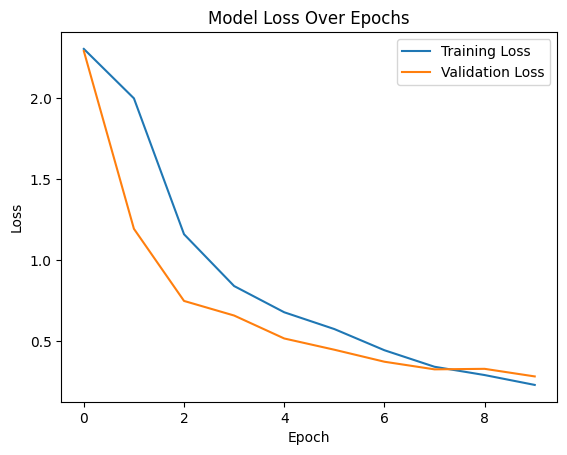

In [168]:
# plotting losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_1.png')
plt.show()
plt.close()

### Variation 2

Training data with data augmentation

In [129]:
# setting up data augmentation generator
datagen = ImageDataGenerator(rotation_range = 20,
                             height_shift_range = 0.2,
                             width_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             fill_mode = 'nearest')

In [133]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y_train)

In [135]:
x_train2.shape

(1319, 64, 64)

In [141]:
x_train2_reshaped = x_train2.reshape(x_train2.shape[0], x_train2.shape[1], x_train2.shape[2],1)

In [137]:
datagen.fit(x_train2.reshape(x_train2.shape[0], x_train2.shape[1], x_train2.shape[2],1))

In [138]:
model2 = Sequential()

# hidden layer 1
model2.add(Conv2D(32,(3,3), input_shape = input_shape, activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 2
model2.add(Conv2D(64,(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

# hidden layer 3
model2.add(Conv2D(128,(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

# hidden layer 4
model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.3))

# final layer
model2.add(Dense(10, activation = 'softmax'))

In [139]:
model2.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [142]:
history2 = model2.fit(datagen.flow(x_train2_reshaped, y_train2, batch_size = 32),
          validation_data = (x_val, y_val),
          epochs = 10)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 244ms/step - accuracy: 0.0881 - loss: 2.3076 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - accuracy: 0.1006 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - accuracy: 0.1023 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3022
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - accuracy: 0.1049 - loss: 2.3021 - val_accuracy: 0.1394 - val_loss: 2.3024
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 244ms/step - accuracy: 0.0896 - loss: 2.3029 - val_accuracy: 0.1879 - val_loss: 2.2997
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.1090 - loss: 2.3021 - val_accuracy: 0.1848 - val_loss: 2.2915
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 258ms/step - accuracy: 0.1117 - loss: 2.3009 - val_accuracy: 0.1333 - val_loss: 2.2940
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 232ms/step - accuracy: 0.1451 - loss: 2.2974 - val_accur

In [143]:
# predicting y_pred2
y_pred2_prob = model2.predict(x_test)
y_pred2_labels = np.argmax(y_pred2_prob, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [153]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print(f'Test loss: {round(test_loss2,2)}')
print(f'Test accuracy: {round(test_accuracy2*100,2)}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2668 - loss: 2.1366
Test loss: 2.15
Test accuracy: 26.15


In [178]:
train_loss2, train_accuracy2 = model2.evaluate(x_train2, y_train2)
print(f'Train loss: {round(train_loss2,2)}')
print(f'Train accuracy: {round(train_accuracy2*100,2)}')

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.2486 - loss: 2.1468
Train loss: 2.15
Train accuracy: 24.72


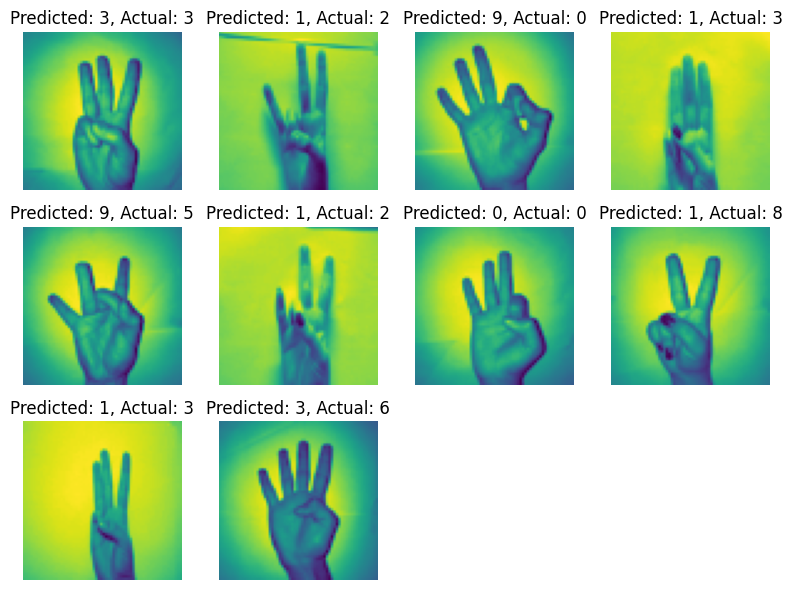

In [171]:
# visualizing predictions
plt.figure(figsize=(8,6))
for i in range(10):
  plt.subplot(3,4,i+1)
  plt.imshow(x_test[i].reshape(img_size, img_size))
  plt.title(f'Predicted: {y_pred2_labels[i]}, Actual: {y_true[i]}')
  plt.axis('off')
plt.tight_layout()
plt.savefig('predictions_2.png')
plt.show()
plt.close()

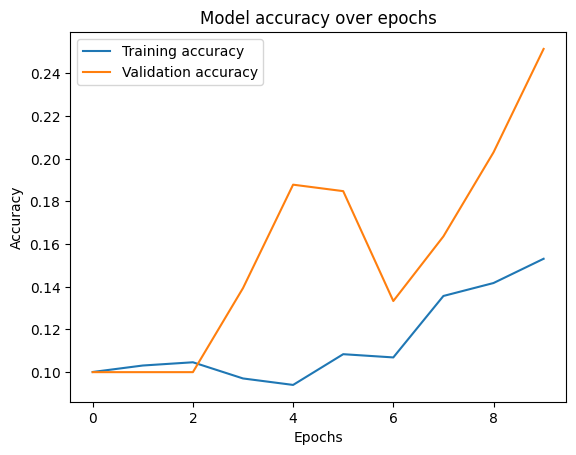

In [172]:
# plotting accuracy
plt.plot(history2.history['accuracy'], label = 'Training accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Model accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_augmentation_2.png')
plt.show()
plt.close()

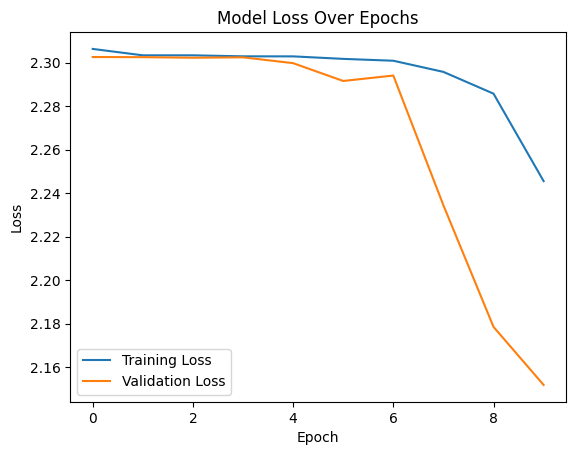

In [173]:
# plotting losses
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_augmentation_2.png')
plt.show()
plt.close()

### Variation 3

Without MaxPooling and Dropout

In [148]:
model3 = Sequential()

model3.add(Conv2D(32,(3,3), input_shape = input_shape, activation = 'relu'))

model3.add(Conv2D(64,(3,3), activation = 'relu'))

model3.add(Conv2D(128,(3,3), activation = 'relu'))

model3.add(Flatten())
model3.add(Dense(128, activation = 'relu'))

model3.add(Dense(10, activation = 'softmax'))

In [149]:
model3.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [150]:
history3 = model3.fit(x_train, y_train,
                      validation_split = 0.2,
                      batch_size = 32,
                      epochs = 10)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.1365 - loss: 4.6409 - val_accuracy: 0.3030 - val_loss: 2.3810
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.5368 - loss: 1.3344 - val_accuracy: 0.7121 - val_loss: 0.9388
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.8000 - loss: 0.6105 - val_accuracy: 0.7576 - val_loss: 0.8233
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8789 - loss: 0.3703 - val_accuracy: 0.7788 - val_loss: 0.9757
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.9228 - loss: 0.2501 - val_accuracy: 0.7818 - val_loss: 0.8703
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.9777 - loss: 0.1048 - val_accuracy: 0.7606 - val_loss: 0.9590
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9868 - loss: 0.0579 - val_accuracy: 0.7455 - val_loss: 1.0763
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9779 - loss: 0.0663 - val_accuracy: 0.7636 - v

In [152]:
# predicting y_pred3
y_pred3_prob = model3.predict(x_test)
y_pred3_labels = np.argmax(y_pred3_prob, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 593ms/step


In [155]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print(f'Test loss: {round(test_loss3,2)}')
print(f'Test accuracy: {round(test_accuracy3*100,2)}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 458ms/step - accuracy: 0.7818 - loss: 1.0766
Test loss: 1.31
Test accuracy: 77.24


In [179]:
train_loss3, train_accuracy3 = model3.evaluate(x_train, y_train)
print(f'Train loss: {round(train_loss3,2)}')
print(f'Train accuracy: {round(train_accuracy3*100,2)}')

52/52 ━━━━━━━━━━━━━━━━━━━━ 27s 525ms/step - accuracy: 0.9927 - loss: 0.0395
Train loss: 0.24
Train accuracy: 95.45


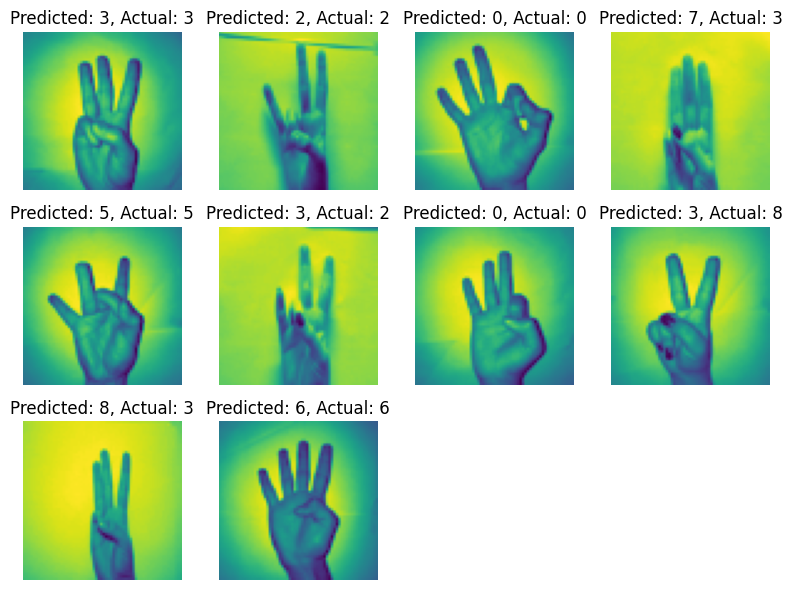

In [174]:
# visualizing predictions
plt.figure(figsize=(8,6))
for i in range(10):
  plt.subplot(3,4,i+1)
  plt.imshow(x_test[i].reshape(img_size, img_size))
  plt.title(f'Predicted: {y_pred3_labels[i]}, Actual: {y_true[i]}')
  plt.axis('off')
plt.tight_layout()
plt.savefig('predictions_3.png')
plt.show()
plt.close()

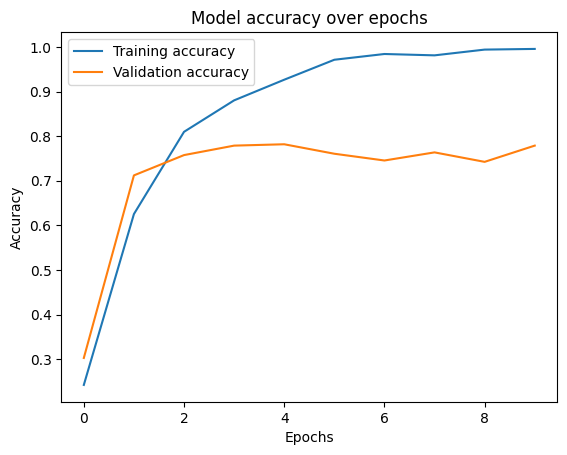

In [175]:
# plotting accuracy
plt.plot(history3.history['accuracy'], label = 'Training accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Model accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_3.png')
plt.show()
plt.close()

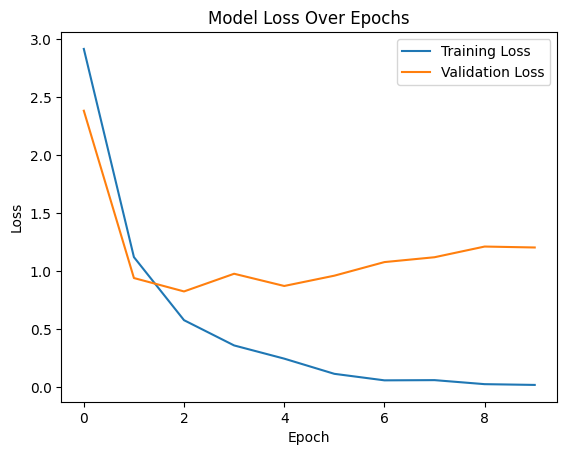

In [176]:
# plotting losses
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_3.png')
plt.show()
plt.close()